In [1]:
import pandas as pd

In [2]:
signup_df = pd.read_csv("C:/Users/nuwba/Desktop/Codeit_2/중급1_프로젝트/주제2_원본데이터/주제2_구독서비스_프로덕트_데이터분석/complete.signup.csv",
                        encoding="utf-8-sig")
free_trial_df = pd.read_csv("C:/Users/nuwba/Desktop/Codeit_2/중급1_프로젝트/주제2_원본데이터/주제2_구독서비스_프로덕트_데이터분석/start.free_trial.csv",
                        encoding="utf-8-sig")
first_sub_df = pd.read_csv("C:/Users/nuwba/Desktop/Codeit_2/중급1_프로젝트/주제2_원본데이터/주제2_구독서비스_프로덕트_데이터분석/complete.subscription.csv",
                        encoding="utf-8-sig")

In [3]:
# 1. user_id 문자열로 변환 (형식 통일)
signup_df['user_id'] = signup_df['user_id'].astype(str)
first_sub_df['user_id'] = first_sub_df['user_id'].astype(str)

# 2. 리마인드 대상(user_id 기준으로 필터링)
remind_users = signup_df['user_id'].unique()
converted_df = first_sub_df[first_sub_df['user_id'].isin(remind_users)].copy()

# 3. user_id별로 첫 구독 이력만 추출
converted_df['client_event_time'] = pd.to_datetime(converted_df['client_event_time'])
converted_df = converted_df.sort_values(by=['user_id', 'client_event_time'])
first_converted_df = converted_df.drop_duplicates(subset='user_id', keep='first')

# 4. 전환된 유저 수 출력
print("리마인드 대상 중 실제 구독 전환된 유저 수:", first_converted_df['user_id'].nunique())

# 5. 결과 확인
first_converted_df

리마인드 대상 중 실제 구독 전환된 유저 수: 12481


,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
3179,Seoul,2023-03-25 14:40:01.647,South Korea,NaN,Mac,Mac,complete.subscription,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,15920,15920,0,NaN
2041,Goyang-si,2023-04-08 11:45:01.586,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,000087537cbfd934375364218ff10f91,131600,131600,0,NaN
13205,Gyeongju,2023-11-29 01:13:51.820,South Korea,NaN,Apple iPad,Apple iPad,complete.subscription,Korean,Mobile Safari,15.4,Web,0001f15911b404f3bf5b8571afafa4e4,15920,15920,0,B
3628,Yuseong-gu,2022-08-20 13:05:01.083,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,104,Web,000be07bc09ceff42c11978f4a9f1c1a,42960,42960,0,NaN
9667,Seongnam-si,2022-04-28 10:49:02.241,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,100,Web,001cd989a26ba664b086b92c364dc9cf,131600,111860,19740,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10592,Seoul,2023-10-29 18:09:42.524,South Korea,NaN,Mac,Mac,complete.subscription,Korean,Safari,16.3,Web,ffe800abf1a0c00994b2a5b1ce68c681,15920,15920,0,A
12255,Busanjin-gu,2023-11-28 13:56:53.231,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,119.0.0.0,Web,ffe8f08cd65e082952aca5a3110f5601,15920,15920,0,B
2546,Seoul,2023-06-25 10:04:08.372,South Korea,NaN,Samsung Phone,Samsung Galaxy Note20 5G,complete.subscription,Korean,Samsung Browser,21.0,Web,ffefd2c23af0e8de9a5bb9aebc498d07,131600,131600,0,NaN
4906,Nowon-gu,2022-06-20 02:03:39.500,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,102,Web,fff219b952002818462faa3746343f09,42960,36516,6444,NaN


In [4]:
# 중복 user_id 개수 확인
duplicate_ids = first_converted_df['user_id'].duplicated().sum()
print(f"중복된 user_id 수: {duplicate_ids}")

# 실제 중복된 user_id 출력 (있을 경우)
if duplicate_ids > 0:
    dup_users = first_converted_df[first_converted_df['user_id'].duplicated(keep=False)]
    print("중복된 user_id 목록:")
    print(dup_users.sort_values(by='user_id'))

중복된 user_id 수: 0


In [5]:
# 1. user_id 및 시간 형식 정리
free_trial_df['user_id'] = free_trial_df['user_id'].astype(str)
free_trial_df['client_event_time'] = pd.to_datetime(free_trial_df['client_event_time'])

# 2. 무료체험과 첫구독 join
merged_df = pd.merge(
    first_converted_df[['user_id', 'client_event_time']],
    free_trial_df[['user_id', 'client_event_time']],
    on='user_id',
    how='left',
    suffixes=('_sub', '_trial')
)

# 3. 무료 체험이 '구독 이전에' 있었던 유저 필터링
used_trial_before_sub = merged_df[
    (merged_df['client_event_time_trial'].notna()) & 
    (merged_df['client_event_time_trial'] < merged_df['client_event_time_sub'])
]

# 4. 결과 출력
"첫 구독 전에 무료 체험한 유저 수:", used_trial_before_sub['user_id'].nunique()

('첫 구독 전에 무료 체험한 유저 수:', 3162)

In [6]:
used_trial_before_sub

,user_id,client_event_time_sub,client_event_time_trial
0,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,2023-03-18 14:39:22.844
1,000087537cbfd934375364218ff10f91,2023-04-08 11:45:01.586,2023-04-01 11:42:25.489
3,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,2022-08-13 12:57:40.928
4,001cd989a26ba664b086b92c364dc9cf,2022-04-28 10:49:02.241,2022-04-27 22:50:58.403
5,001ddbe4885db89888b34bf0eb14f6e1,2022-04-10 06:02:28.859,2022-03-20 23:05:23.986
...,...,...,...
15237,fff219b952002818462faa3746343f09,2022-06-20 02:03:39.500,2022-06-18 22:16:55.489
15238,fff219b952002818462faa3746343f09,2022-06-20 02:03:39.500,2022-06-18 22:18:36.789
15239,fff219b952002818462faa3746343f09,2022-06-20 02:03:39.500,2022-06-18 22:19:03.661
15240,fff219b952002818462faa3746343f09,2022-06-20 02:03:39.500,2022-06-18 22:19:49.294


In [7]:
# 고유 user_id만 추출
unique_trial_user_ids = used_trial_before_sub['user_id'].drop_duplicates().reset_index(drop=True)

# DataFrame으로 변환
unique_trial_users_df = pd.DataFrame(unique_trial_user_ids, columns=['user_id'])

# 확인
print("고유한 유저 수:", unique_trial_users_df.shape[0])
unique_trial_users_df

고유한 유저 수: 3162


,user_id
0,0000572f2ba8079bcefd2760b632e820
1,000087537cbfd934375364218ff10f91
2,000be07bc09ceff42c11978f4a9f1c1a
3,001cd989a26ba664b086b92c364dc9cf
4,001ddbe4885db89888b34bf0eb14f6e1
...,...
3157,ff9bb243eff83d84e2cb289ff629aba8
3158,ffa1cfa6bc3b410a927be11e23ff5340
3159,ffa8c1ccd9af84e29a0f9aa8d7dc33a6
3160,ffe13db0ad3751c9be06a73aa38bc9fc


In [8]:
# 1. 무료 체험 시작일: user_id별 첫 무료체험 이력
free_trial_df['client_event_time'] = pd.to_datetime(free_trial_df['client_event_time'])
first_trial_only = (
    free_trial_df
    .sort_values(by='client_event_time')
    .drop_duplicates(subset='user_id', keep='first')
    .rename(columns={'client_event_time': 'trial_start_time'})
)

# 2. 첫 구독일: user_id별 첫 구독 이력
first_sub_df['client_event_time'] = pd.to_datetime(first_sub_df['client_event_time'])
first_subscription_only = (
    first_sub_df
    .sort_values(by='client_event_time')
    .drop_duplicates(subset='user_id', keep='first')
    .rename(columns={'client_event_time': 'subscription_time'})
)

# 3. 3162명 기준 merge
merged_users = unique_trial_users_df.copy()
merged_users = merged_users.merge(
    first_trial_only[['user_id', 'trial_start_time']],
    on='user_id', how='left'
)
merged_users = merged_users.merge(
    first_subscription_only[['user_id', 'subscription_time']],
    on='user_id', how='left'
)

# 4. 날짜 차이 계산 (datetime으로 변환 보장)
merged_users['days_to_subscribe'] = (
    pd.to_datetime(merged_users['subscription_time']) - 
    pd.to_datetime(merged_users['trial_start_time'])
).dt.days

# 5. 확인
print("최종 유저 수:", merged_users.shape[0])
merged_users[['user_id', 'trial_start_time', 'subscription_time', 'days_to_subscribe']]


최종 유저 수: 3162


,user_id,trial_start_time,subscription_time,days_to_subscribe
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 14:39:22.844,2023-03-25 14:40:01.647,7
1,000087537cbfd934375364218ff10f91,2023-04-01 11:42:25.489,2023-04-08 11:45:01.586,7
2,000be07bc09ceff42c11978f4a9f1c1a,2022-08-13 12:57:40.928,2022-08-20 13:05:01.083,7
3,001cd989a26ba664b086b92c364dc9cf,2022-04-27 22:50:58.403,2022-04-28 10:49:02.241,0
4,001ddbe4885db89888b34bf0eb14f6e1,2022-03-18 06:24:20.014,2022-04-10 06:02:28.859,22
...,...,...,...,...
3157,ff9bb243eff83d84e2cb289ff629aba8,2023-03-15 06:26:30.990,2023-03-22 06:30:01.899,7
3158,ffa1cfa6bc3b410a927be11e23ff5340,2022-09-04 15:20:39.400,2022-12-19 12:50:01.076,105
3159,ffa8c1ccd9af84e29a0f9aa8d7dc33a6,2023-04-03 13:52:22.245,2023-04-10 13:55:02.421,7
3160,ffe13db0ad3751c9be06a73aa38bc9fc,2022-09-01 02:32:07.177,2022-09-08 02:35:01.476,7


In [9]:
# 컬럼명 변경 (영→한)
merged_users_kr = merged_users.rename(columns={
    'user_id': '유저 ID',
    'trial_start_time': '무료 체험 시작일',
    'subscription_time': '첫 구독일',
    'days_to_subscribe': '구독까지 걸린 일수'
})

# 확인
merged_users_kr


,유저 ID,무료 체험 시작일,첫 구독일,구독까지 걸린 일수
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 14:39:22.844,2023-03-25 14:40:01.647,7
1,000087537cbfd934375364218ff10f91,2023-04-01 11:42:25.489,2023-04-08 11:45:01.586,7
2,000be07bc09ceff42c11978f4a9f1c1a,2022-08-13 12:57:40.928,2022-08-20 13:05:01.083,7
3,001cd989a26ba664b086b92c364dc9cf,2022-04-27 22:50:58.403,2022-04-28 10:49:02.241,0
4,001ddbe4885db89888b34bf0eb14f6e1,2022-03-18 06:24:20.014,2022-04-10 06:02:28.859,22
...,...,...,...,...
3157,ff9bb243eff83d84e2cb289ff629aba8,2023-03-15 06:26:30.990,2023-03-22 06:30:01.899,7
3158,ffa1cfa6bc3b410a927be11e23ff5340,2022-09-04 15:20:39.400,2022-12-19 12:50:01.076,105
3159,ffa8c1ccd9af84e29a0f9aa8d7dc33a6,2023-04-03 13:52:22.245,2023-04-10 13:55:02.421,7
3160,ffe13db0ad3751c9be06a73aa38bc9fc,2022-09-01 02:32:07.177,2022-09-08 02:35:01.476,7


In [10]:
merged_users_kr["구독까지 걸린 일수"].value_counts().sort_index()

구독까지 걸린 일수
0      748
1       95
2       72
3      125
4       61
      ... 
564      2
587      1
614      1
662      1
711      1
Name: count, Length: 241, dtype: int64

In [11]:
merged_users_kr.isna().sum()

유저 ID         0
무료 체험 시작일     0
첫 구독일         0
구독까지 걸린 일수    0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정 (운영체제에 따라 자동 설정)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # 리눅스 (예: Colab 등)
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [13]:
# 전체 3162명 기준
total_users = merged_users_kr.shape[0]

# 구독까지 걸린 일수 분포
days_counts = merged_users_kr['구독까지 걸린 일수'].value_counts().sort_index()

# 누적 합
cumulative_counts = days_counts.cumsum()

# 누적 전환율 계산 (%)
cumulative_rate = cumulative_counts / total_users * 100

# DataFrame으로 정리
conversion_curve = pd.DataFrame({
    '일수': cumulative_rate.index,
    '누적 전환자 수': cumulative_counts.values,
    '누적 전환율(%)': cumulative_rate.values
})

In [14]:
conversion_curve

,일수,누적 전환자 수,누적 전환율(%)
0,0,748,23.655914
1,1,843,26.660342
2,2,915,28.937381
3,3,1040,32.890576
4,4,1101,34.819734
...,...,...,...
236,564,3158,99.873498
237,587,3159,99.905123
238,614,3160,99.936749
239,662,3161,99.968374


In [15]:
# conversion_curve를 CSV 파일로 저장
conversion_curve.to_csv("conversion_curve.csv", index=False, encoding='utf-8-sig')

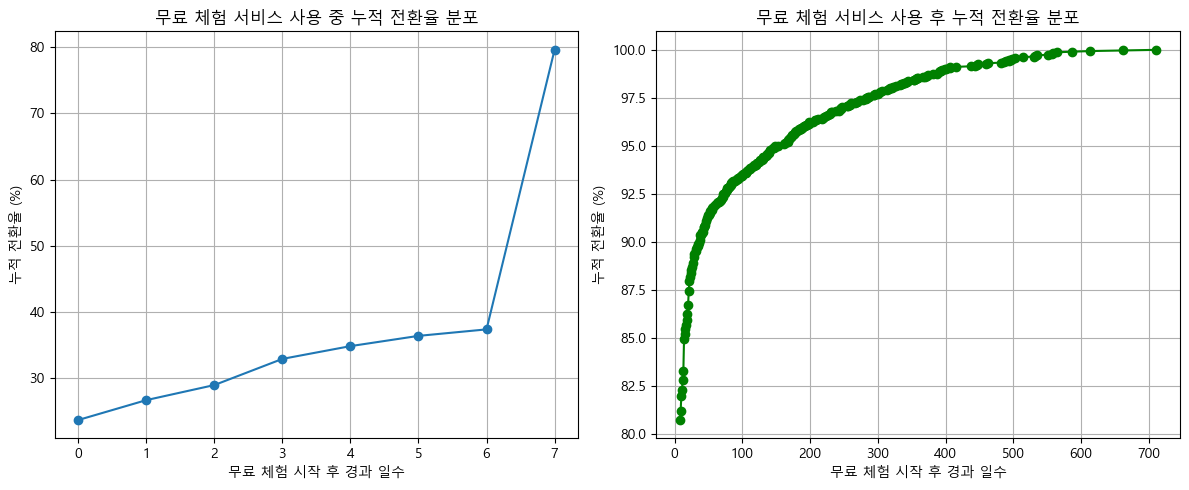

In [26]:
plt.figure(figsize=(12, 5))

# 그래프 1: 0~7일 이내
plt.subplot(1, 2, 1)
within_7 = conversion_curve[conversion_curve['일수'] <= 7]
plt.plot(within_7['일수'], within_7['누적 전환율(%)'], marker='o')
plt.title('무료 체험 서비스 사용 중 누적 전환율 분포')
plt.xlabel('무료 체험 시작 후 경과 일수')
plt.ylabel('누적 전환율 (%)')
plt.grid(True)

# 그래프 2: 8일 이상
plt.subplot(1, 2, 2)
after_7 = conversion_curve[conversion_curve['일수'] >= 8]
plt.plot(after_7['일수'], after_7['누적 전환율(%)'], marker='o', color='green')
plt.title('무료 체험 서비스 사용 후 누적 전환율 분포')
plt.xlabel('무료 체험 시작 후 경과 일수')
plt.ylabel('누적 전환율 (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

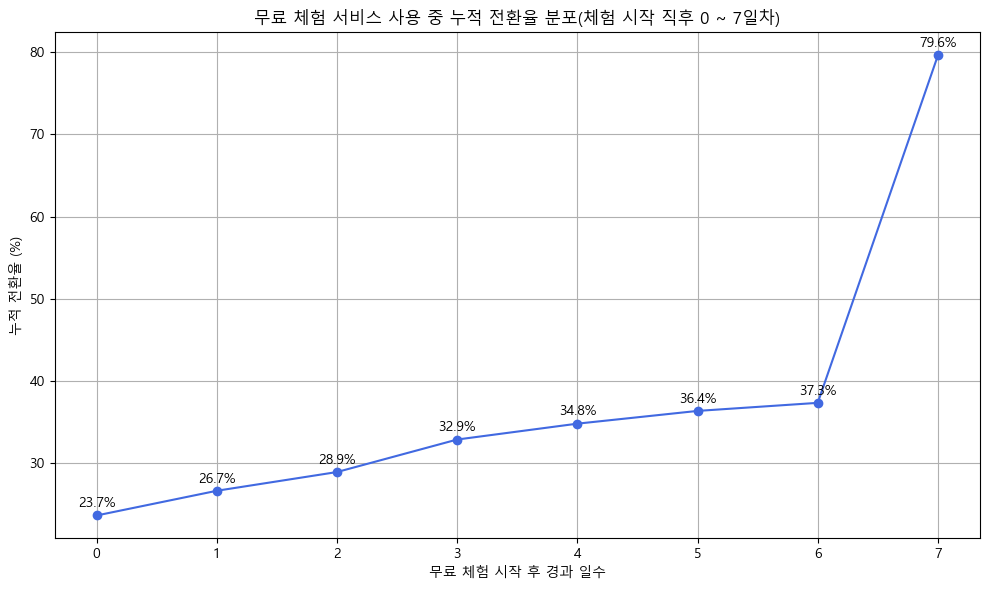

In [41]:
# 7일 이내 데이터만 추출
within_7 = conversion_curve[conversion_curve['일수'] <= 7]

# 그래프 크기 조절: 가로로 넓은 직사각형
plt.figure(figsize=(10, 6))

# 선 그래프 + 점 + 라벨
plt.plot(within_7['일수'], within_7['누적 전환율(%)'], marker='o', color='royalblue')
plt.title('무료 체험 서비스 사용 중 누적 전환율 분포(체험 시작 직후 0 ~ 7일차)')
plt.xlabel('무료 체험 시작 후 경과 일수')
plt.ylabel('누적 전환율 (%)')
plt.grid(True)

# 각 점 위에 전환율 숫자 표시
for x, y in zip(within_7['일수'], within_7['누적 전환율(%)']):
    plt.text(x, y + 1, f'{y:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

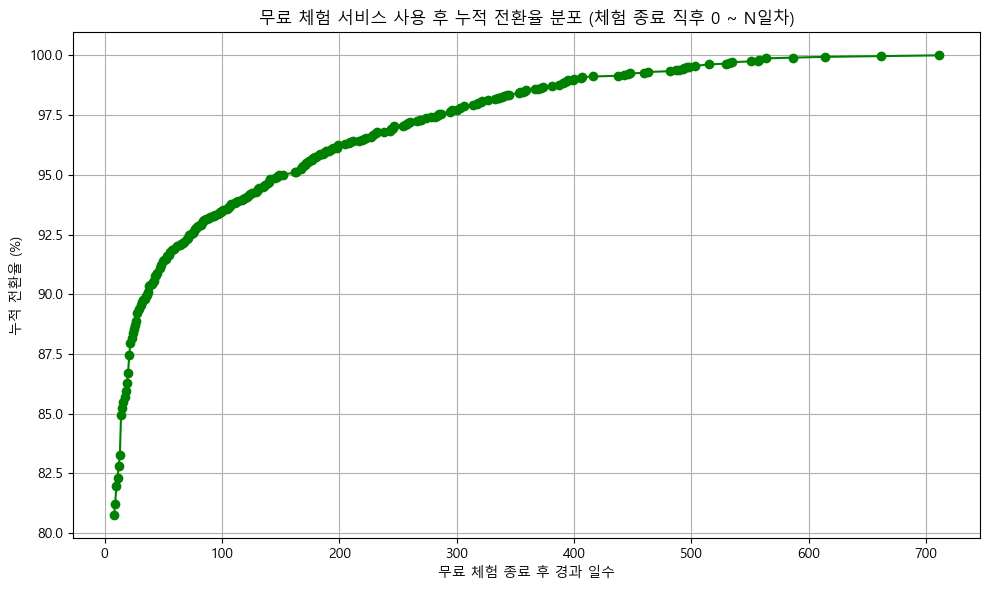

In [16]:
after_7 = conversion_curve[conversion_curve['일수'] >= 8]

plt.figure(figsize=(10, 6))

plt.plot(after_7['일수'], after_7['누적 전환율(%)'], marker='o', color='green')
plt.title('무료 체험 서비스 사용 후 누적 전환율 분포 (체험 종료 직후 0 ~ N일차)')
plt.xlabel('무료 체험 종료 후 경과 일수')
plt.ylabel('누적 전환율 (%)')
plt.grid(True)

plt.tight_layout()
plt.show()